In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.ensemble import IsolationForest
from matplotlib import cm
from sklearn.metrics import silhouette_score

In [2]:
def ReadData(datasetName):
    all_data=pd.read_csv(datasetName)
    print(all_data.shape)
    all_data.head()
    return all_data

In [3]:
def trainDataset(all_data):
    train=all_data.iloc[:40000,1:3]
    print(train.shape)
    train.head()
    x=train.values
    plt.scatter(x[:,0],x[:,1])
    #plt.xlabel('Kill')
    #plt.ylabel('Walk')
    return train

In [10]:
def IsolationForestClustering(train):
    rs=np.random.RandomState(0)
    clf = IsolationForest(max_samples=100,random_state=rs, contamination=.01) 
    clf.fit(train)
    if_scores = clf.decision_function(train)
    if_anomalies=clf.predict(train)
    labels=if_anomalies
    print(labels)
    if_anomalies=pd.Series(if_anomalies).replace([-1,1],[1,0])
    if_anomalies=train[if_anomalies==1];
    return if_anomalies,labels

In [11]:
def graph_for_anomalies(train,if_anomalies):
    cmap=np.array(['white','red'])
    plt.scatter(train.iloc[:,0],train.iloc[:,1],c='white',s=20,edgecolor='k')
    plt.scatter(if_anomalies.iloc[:,0],if_anomalies.iloc[:,1],c='red')
    plt.xlabel('Kill')
    plt.ylabel('Walk')
    plt.title('Isolation Forests')

In [12]:
def accuracy_score(train,labels):
    print(f'Silhouette Score: {silhouette_score(train, labels)}')

(87898, 3)
(87898, 2)


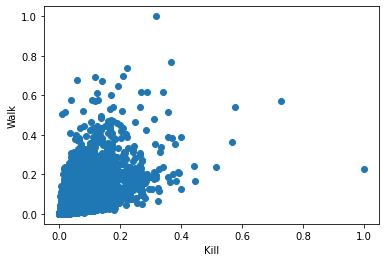

In [13]:
data=ReadData('Kill_Ride.csv')
trained_data=trainDataset(data)


In [14]:
anomalies,labels=IsolationForestClustering(trained_data)


[1 1 1 ... 1 1 1]


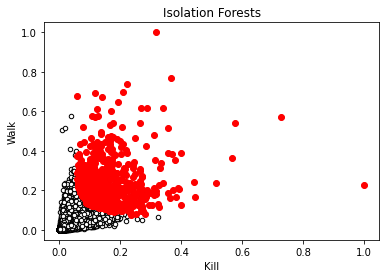

In [15]:
graph_for_anomalies(trained_data,anomalies)


In [17]:
print(f'Silhouette Score: {silhouette_score(trained_data, labels)}')

Silhouette Score: 0.8536081754158598


(87898, 3)
(87898, 2)


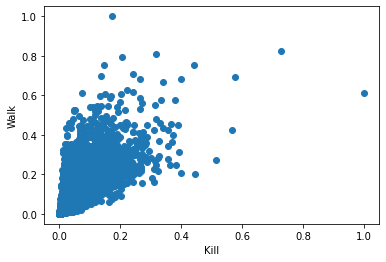

In [18]:
data=ReadData('Kill_Walk.csv')
trained_data=trainDataset(data)

In [19]:
anomalies,labels=IsolationForestClustering(trained_data)

[1 1 1 ... 1 1 1]


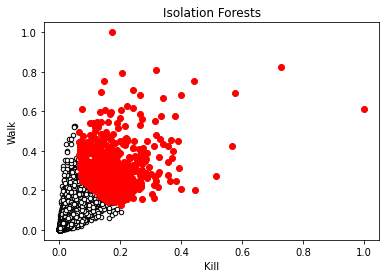

In [20]:
graph_for_anomalies(trained_data,anomalies)

In [21]:
print(f'Silhouette Score: {silhouette_score(trained_data, labels)}')

Silhouette Score: 0.8233328409508318


(87898, 3)
(87898, 2)


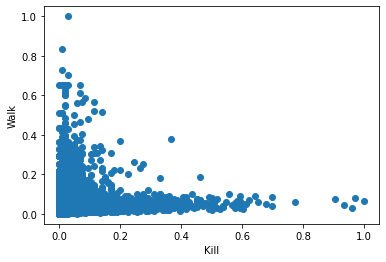

In [22]:
data=ReadData('Headshots.csv')
trained_data=trainDataset(data)

In [23]:
anomalies,labels=IsolationForestClustering(trained_data)

[1 1 1 ... 1 1 1]


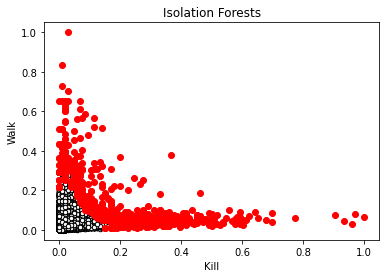

In [24]:
graph_for_anomalies(trained_data,anomalies)

In [25]:
print(f'Silhouette Score: {silhouette_score(trained_data, labels)}')

Silhouette Score: 0.8510583110944586
